# Assignment 2

Please read the following instructions carefully:

This assignment will test your knowledge of machine learning, data visualisation, and computer vision techniques in Python. This will primarily focus on scikit-learn, seaborn/matplotlib and skimage/opencv, and how to program using these packages and as such you should use the appropriate functionality provided by the packages. You may also use Numpy, panda, etc. where appropriate for some questions. Do not use any other external packages other than these.

In the below questions you will generally need to complete the code in the cell below the question and output the required results, charts or graphs.

Questions 1-5 are each worth 5 marks.

#### 1. Load/download and normalize the FashionMNIST training and test datasets using the instructions shown here: https://github.com/zalandoresearch/fashion-mnist#usage.
#### Please download both the training and testing sets, and load the training images, training labels, testing images, and testing labels as 'x_train', 'y_train', 'x_test', and 'y_test, correspondingly.
    
#### And show some training images by visualising a few images from the training set.

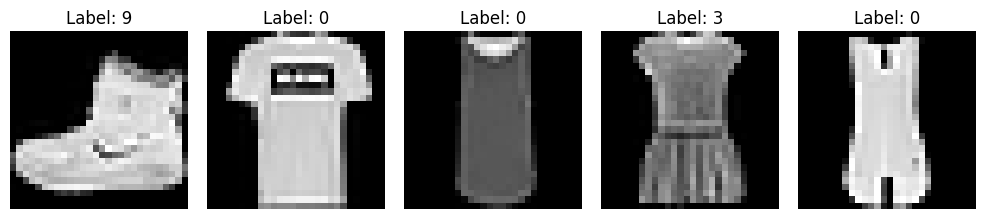

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to load Fashion MNIST images
def load_mnist_images(filename):   #reads binary data of the image file
    with open(filename, 'rb') as f: #np.uint8 ensures that the pixel values in the dataset are stored in a grayscale image format.
        data = np.frombuffer(f.read(), np.uint8, offset=16) #offset skips the initial header bytes (8-bit because handling image data)
        data = data.reshape(-1, 28, 28) #reshapes it to form images with dimensions
    return data

# Function to load Fashion MNIST labels,  reads the label file and converts the binary data into a NumPy array
def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8) #Converts the read binary data into a NumPy array of unsigned 8-bit integers
    return data

# Define paths to the downloaded files
train_images_path = '/content/data/train-images-idx3-ubyte'
train_labels_path = '/content/data/train-labels-idx1-ubyte'
test_images_path = '/content/data/t10k-images-idx3-ubyte'
test_labels_path = '/content/data/t10k-labels-idx1-ubyte'

# Load training images and labels
x_train = load_mnist_images(train_images_path)
y_train = load_mnist_labels(train_labels_path)

# Load test images and labels
x_test = load_mnist_images(test_images_path)
y_test = load_mnist_labels(test_labels_path)

# Normalize pixel values, helps in model traing
x_train = x_train / 255.0 # Scales the pixel values of the images between 0 and 1
x_test = x_test / 255.0

# Visualize some training images
plt.figure(figsize=(10, 10))  #dimensions of the image plots
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray') #cmap='gray' is used to black and white visualization
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()




#### 2. Please show 5 images from the training set in a row (similar to what you have done above), but this time also show the corresponding category name (e.g. T-shirt, Dress, Bag, etc., detailed definition of the categories is list on the dataset link above) on top of each image as its title.



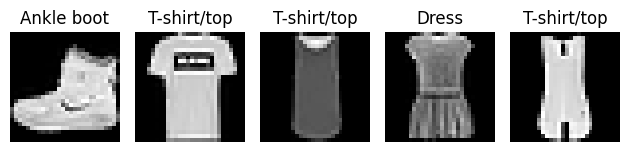

In [2]:

# Mapping of category numbers to the labels
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
for i in range(5): #Loops through the first 5 images in the training set.
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### 3. Apply a support vector classifier on the above (training) data. And use the learned/trained classifier to predict the category value on the test set.
#### The parameters to be used in the SVM classifier are: linear kernel, regularization of 0.025, and all others by default.

#### If you find the training over the whole training set takes too much time (e.g. > 10 minutes), you may only use the first 10,000 samples of the training set instead.

#### Please also show 5 examples from the test set, with the title being "predicted category name (ground-truth category name)", e.g. "Shirt (Shirt)".

SVC Accuracy: 0.8387
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.81      0.80      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.73      0.74      0.73      1000
       Dress       0.84      0.88      0.86      1000
        Coat       0.74      0.76      0.75      1000
      Sandal       0.93      0.91      0.92      1000
       Shirt       0.61      0.56      0.58      1000
     Sneaker       0.89      0.92      0.90      1000
         Bag       0.94      0.95      0.94      1000
  Ankle boot       0.93      0.93      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



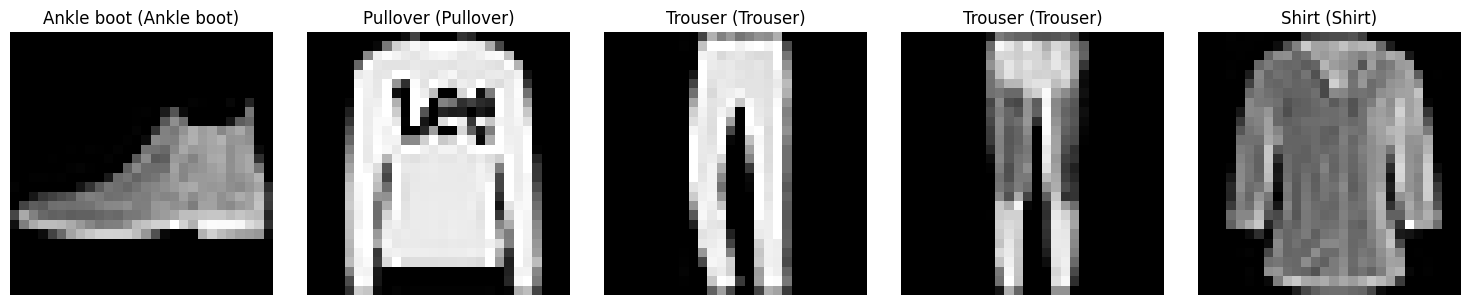

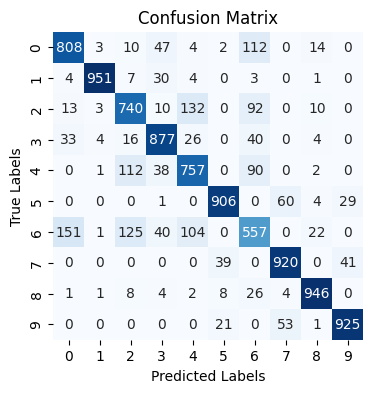

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

#Creating an SVC with a linear kernel and regularization of 0.025
svc = SVC(kernel='linear', C=0.025)

#using the first 10,000 samples
max_samples = 10000
x_train_subset = x_train[:max_samples] #creating a subset of training data by using samples from the original dataset
y_train_subset = y_train[:max_samples]

# Fitting the SVC to the training subset
#reshaping the data into 2D as it was in 3D, SVM expects data in 2D format
svc.fit(x_train_subset.reshape(-1, 28 * 28), y_train_subset) #reshape the images into flat vector for each image

# Predicting on the test set
y_pred = svc.predict(x_test.reshape(-1, 28 * 28))

# Calculate accuracy for SVC
accuracy_svc = accuracy_score(y_test, y_pred)  # comparing predicted labels with the true labels of the test set
print(f"SVC Accuracy: {accuracy_svc}")

# Displaying classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=list(class_names.values())))

# Displaying 5 examples from the test set with predicted and ground-truth category names
class_names = {
    0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
    5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'
}

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    predicted_label = class_names[y_pred[i]]
    true_label = class_names[y_test[i]]
    plt.title(f"{predicted_label} ({true_label})")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification report helps in highlighting a model's predictive accuracy for each class. The classification report highlights certain metrics like precision, recall, F1-score and support.
precision shows the positive predictions made by the model.
recall calculates the percentage of all actual positive cases that were successfully predicted.
F1-score evaluates the classifier's performance.
support is the total number of actual instances in every class.

Confusion matrix shows the number of accurate and inaccurate predictions the model made on a dataset visualizing the performance of a classifier.

#### 4. Similar to above, but use a neural network (i.e. MLP classifier) for the classification task, and training it for 1000 maximum numebr of iterations, with the L2 penalty of 1.
#### First use the same 10,000 training samples, then change the number of training samples to the whole training set. Think about the difference between this classifier and the above SVM classifier.

#### Please also show 5 samples from the test set (same as above), and also print the text report of the main classification metrics. Think about how does it differ from the results in the above SVM classification model (i.e. you need to print out the classification metrics for the above SVM model to compare).

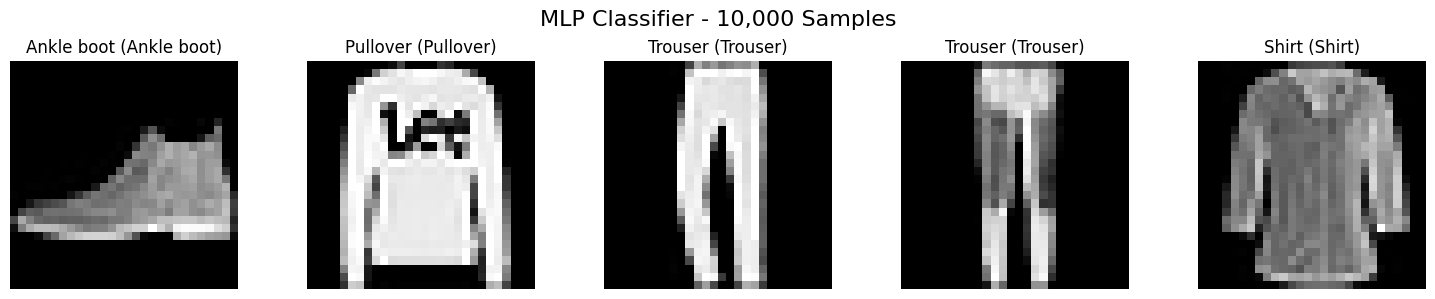

Classification Report for MLP Classifier (10,000 Samples):
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.78      0.80      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.78      0.72      0.75      1000
       Dress       0.84      0.87      0.85      1000
        Coat       0.72      0.82      0.77      1000
      Sandal       0.90      0.94      0.92      1000
       Shirt       0.65      0.61      0.63      1000
     Sneaker       0.91      0.90      0.91      1000
         Bag       0.93      0.95      0.94      1000
  Ankle boot       0.93      0.92      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



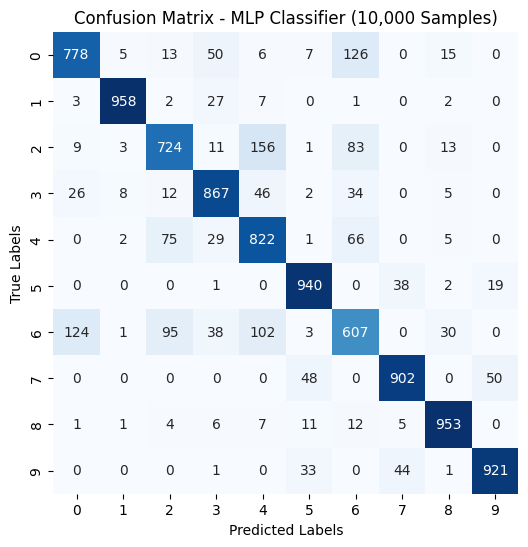

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

#use the first 10,000 samples
max_samples = 10000
x_train_subset = x_train[:max_samples]
y_train_subset = y_train[:max_samples]

# Creating MLP classifier with 1000 iterations and L2 penalty of 1
#L2 regularization helps prevent overfitting by discouraging extreme changes in the model's weights
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)

# Fitting the MLP to the training subset
mlp.fit(x_train_subset.reshape(-1, 28 * 28), y_train_subset)

# Predicting on the test set
y_pred_mlp = mlp.predict(x_test.reshape(-1, 28 * 28))

# Calculate accuracy for MLP classifier (10,000 samples)
accuracy_mlp_subset = accuracy_score(y_test, y_pred_mlp)

# Displaying 5 examples from the test set with predicted and ground-truth category names (Subset)
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    predicted_label = class_names[y_pred_mlp[i]]
    true_label = class_names[y_test[i]]
    plt.title(f"{predicted_label} ({true_label})")
    plt.axis('off')

plt.suptitle("MLP Classifier - 10,000 Samples", fontsize=16)
plt.tight_layout()
plt.show()

# Print classification report for MLP classifier
print("Classification Report for MLP Classifier (10,000 Samples):")
print(classification_report(y_test, y_pred_mlp, target_names=list(class_names.values())))

# Calculate confusion matrix for MLP classifier (10,000 samples)
conf_matrix_subset = confusion_matrix(y_test, y_pred_mlp)

# Plot confusion matrix for MLP classifier (10,000 samples)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_subset, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - MLP Classifier (10,000 Samples)')
plt.show()


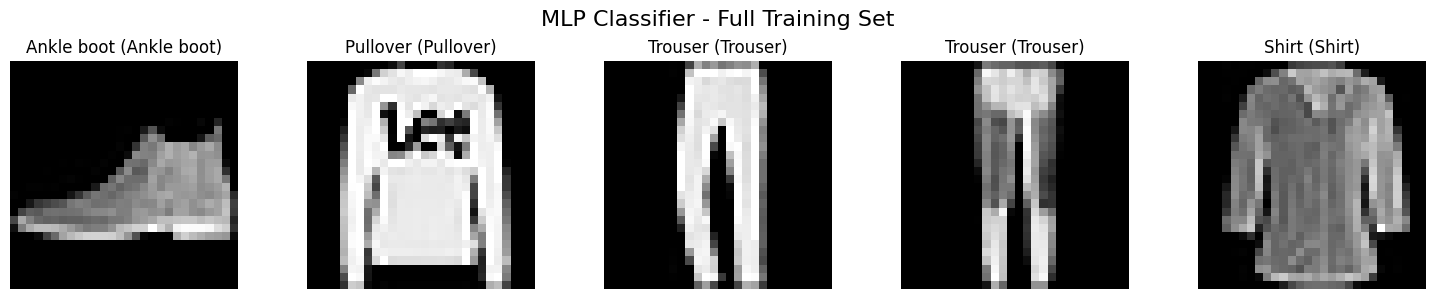

Classification Report for MLP Classifier (Full Training Set):
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.83      0.81      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.69      0.81      0.75      1000
       Dress       0.81      0.90      0.85      1000
        Coat       0.72      0.80      0.76      1000
      Sandal       0.91      0.93      0.92      1000
       Shirt       0.80      0.44      0.57      1000
     Sneaker       0.90      0.93      0.91      1000
         Bag       0.93      0.95      0.94      1000
  Ankle boot       0.95      0.92      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



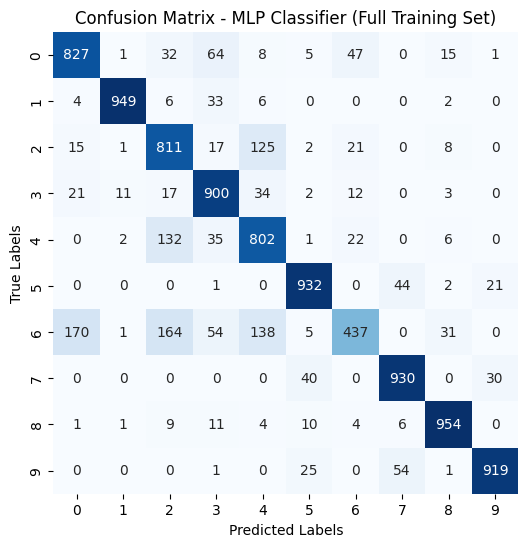

In [10]:
# Using the full training set
mlp_full = MLPClassifier(max_iter=1000, alpha=1, random_state=42)

# Fitting the MLP to the full training set
mlp_full.fit(x_train.reshape(-1, 28 * 28), y_train)

# Predicting on the test set using the MLP classifier trained on the full training set
y_pred_mlp_full = mlp_full.predict(x_test.reshape(-1, 28 * 28))

# Displaying 5 examples from the test set with predicted and ground-truth category names (Full)
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    predicted_label = class_names[y_pred_mlp_full[i]]
    true_label = class_names[y_test[i]]
    plt.title(f"{predicted_label} ({true_label})")
    plt.axis('off')

plt.suptitle("MLP Classifier - Full Training Set", fontsize=16)
plt.tight_layout()
plt.show()

# Calculate accuracy for MLP classifier (full training set)
accuracy_mlp_full = accuracy_score(y_test, y_pred_mlp_full)

# Print classification report for MLP classifier using the full training set
print("Classification Report for MLP Classifier (Full Training Set):")
print(classification_report(y_test, y_pred_mlp_full, target_names=list(class_names.values())))

# Calculate confusion matrix for MLP classifier (full training set)
conf_matrix_full = confusion_matrix(y_test, y_pred_mlp_full)

# Plot confusion matrix for MLP classifier (full training set)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_full, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - MLP Classifier (Full Training Set)')
plt.show()


In [11]:
print(f"MLP Classifier Accuracy (10,000 Samples): {accuracy_mlp_subset}")
print(f"MLP Classifier Accuracy (Full Training Set): {accuracy_mlp_full}")


MLP Classifier Accuracy (10,000 Samples): 0.8472
MLP Classifier Accuracy (Full Training Set): 0.8461


#### 5. Please apply a Sobel edge detector on the above dataset images (both training and testing), then train the same MLP classifier as above (on the whole new trianing set), show the prediction results of 5 samples from the (new) test set, with the "prediction (ground-truth label)" as title for each sample, and also reprot the main classification matrics.

#### Similarly, apply a bilateral filter (neighborhood diameter 9 and both sigma for color and space set to 85) to the original dataset images (both training and testing), then train the same MLP classifier, show the prediction, and the metrics, same as above. Compare the difference between the original-image-based classification, edge-based classification, and this filtered-image-based classification.

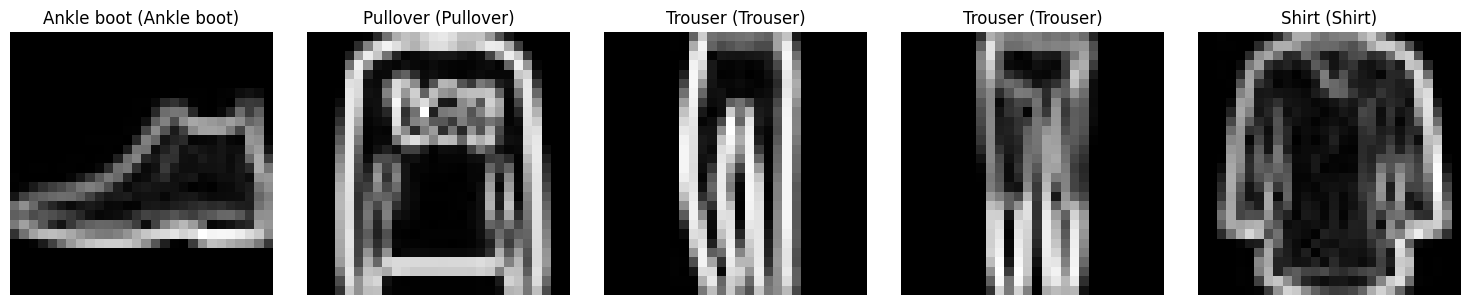

Classification Report for MLP Classifier (Sobel Edge Detection):

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.80      0.81      1000
     Trouser       0.97      0.94      0.95      1000
    Pullover       0.74      0.74      0.74      1000
       Dress       0.84      0.84      0.84      1000
        Coat       0.69      0.84      0.76      1000
      Sandal       0.91      0.93      0.92      1000
       Shirt       0.66      0.53      0.59      1000
     Sneaker       0.92      0.86      0.89      1000
         Bag       0.93      0.94      0.93      1000
  Ankle boot       0.90      0.95      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [14]:
from skimage.filters import sobel

# Apply Sobel edge detection on the training set and flatten for MLP input
x_train_sobel_flat = np.array([sobel(image).reshape(-1) for image in x_train])

# Apply Sobel edge detection on the test set and flatten for MLP input, as MLP works with flattened vector not 2D
x_test_sobel_flat = np.array([sobel(image).reshape(-1) for image in x_test])

# Create MLP classifier for the Sobel edge-detected training set
mlp_sobel = MLPClassifier(max_iter=1000, alpha=1, random_state=42)

# Fit the MLP classifier on the edge-detected training set
mlp_sobel.fit(x_train_sobel_flat, y_train)

# Predict on the edge-detected test set
y_pred_sobel = mlp_sobel.predict(x_test_sobel_flat)

# Display 5 examples from the Sobel edge-detected test set with predicted and ground-truth category names
plt.figure(figsize=(15, 3))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sobel(x_test[i]), cmap='gray')
    predicted_label = class_names[y_pred_sobel[i]]
    true_label = class_names[y_test[i]]
    plt.title(f"{predicted_label} ({true_label})")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print classification report for the Sobel edge-detected classifier
print("Classification Report for MLP Classifier (Sobel Edge Detection):\n")
print(classification_report(y_test, y_pred_sobel, target_names=class_names.values()))


Classification Report for MLP Classifier (Filtered Image):
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.81      0.80      1000
     Trouser       0.96      0.95      0.95      1000
    Pullover       0.64      0.84      0.73      1000
       Dress       0.80      0.88      0.83      1000
        Coat       0.72      0.76      0.74      1000
      Sandal       0.89      0.93      0.91      1000
       Shirt       0.79      0.34      0.48      1000
     Sneaker       0.88      0.93      0.90      1000
         Bag       0.93      0.95      0.94      1000
  Ankle boot       0.95      0.89      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.82     10000
weighted avg       0.83      0.83      0.82     10000



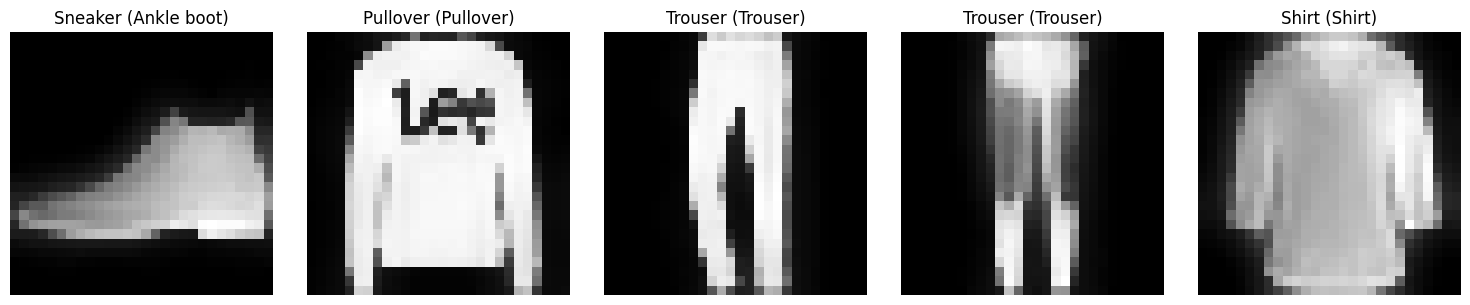

In [15]:
import cv2
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#cv2.bilateralFilter() function expects images in uint8 format with pixel values ranging from 0 to 255
# Convert images to 8-bit unsigned integer format, scaling the values back from the range [0, 1] to [0, 255].
x_train_uint8 = (x_train * 255).astype(np.uint8)
x_test_uint8 = (x_test * 255).astype(np.uint8)

# Function to apply bilateral filter to an image
def apply_bilateral_filter(image):
    return cv2.bilateralFilter(image, 9, 85, 85)

# Apply bilateral filter to the training and testing datasets
x_train_filtered = np.array([apply_bilateral_filter(image) for image in x_train_uint8])
x_test_filtered = np.array([apply_bilateral_filter(image) for image in x_test_uint8])

# Convert filtered images back to the original scale
x_train_filtered = x_train_filtered.astype(np.float32) / 255.0
x_test_filtered = x_test_filtered.astype(np.float32) / 255.0


# Reshape the filtered images for MLP classifier compatibility
x_train_filtered_flat = x_train_filtered.reshape(x_train_filtered.shape[0], -1)
x_test_filtered_flat = x_test_filtered.reshape(x_test_filtered.shape[0], -1)

# Train the MLP classifier using filtered images
mlp_filtered = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp_filtered.fit(x_train_filtered_flat, y_train)

# Predict on the test set using the trained MLP classifier
y_pred_filtered = mlp_filtered.predict(x_test_filtered_flat)

class_names_list = [class_names[i] for i in range(len(class_names))]

# Display classification report for the filtered-image-based MLP classifier
print("Classification Report for MLP Classifier (Filtered Image):")
print(classification_report(y_test, y_pred_filtered, target_names=class_names_list))

# Display 5 examples from the filtered test set with predicted and ground-truth category names
plt.figure(figsize=(15, 3))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_filtered[i].reshape(28, 28), cmap='gray')  # Assuming images are 28x28
    predicted_label = class_names_list[y_pred_filtered[i]]
    true_label = class_names_list[y_test[i]]
    plt.title(f"{predicted_label} ({true_label})")
    plt.axis('off')

plt.tight_layout()
plt.show()

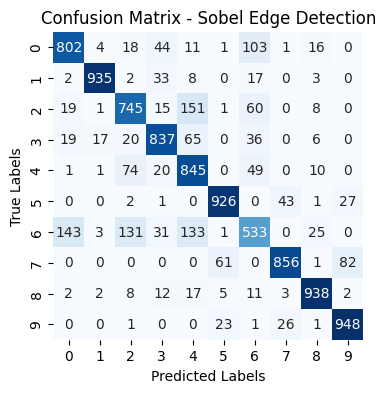

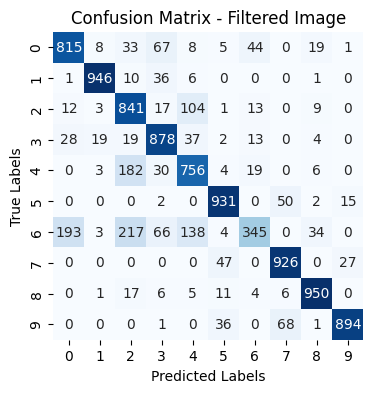

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for Sobel edge-detected classifier
conf_matrix_sobel = confusion_matrix(y_test, y_pred_sobel)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_sobel, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Sobel Edge Detection')
plt.show()

# Confusion matrix for filtered-image-based classifier
conf_matrix_filtered = confusion_matrix(y_test, y_pred_filtered)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_filtered, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Filtered Image')
plt.show()


In [17]:
# Print classification report for MLP classifier using the full training set
print("Classification Report for MLP Classifier (Full Training Set):")
print(classification_report(y_test, y_pred_mlp_full, target_names=list(class_names.values())))

print("Classification Report for MLP Classifier (Sobel Edge Detection):\n")
print(classification_report(y_test, y_pred_sobel, target_names=class_names.values()))

print("\n\nClassification Report for MLP Classifier (Filtered Image):\n")
print(classification_report(y_test, y_pred_filtered, target_names=class_names_list))


Classification Report for MLP Classifier (Full Training Set):
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.83      0.81      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.69      0.81      0.75      1000
       Dress       0.81      0.90      0.85      1000
        Coat       0.72      0.80      0.76      1000
      Sandal       0.91      0.93      0.92      1000
       Shirt       0.80      0.44      0.57      1000
     Sneaker       0.90      0.93      0.91      1000
         Bag       0.93      0.95      0.94      1000
  Ankle boot       0.95      0.92      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000

Classification Report for MLP Classifier (Sobel Edge Detection):

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.80      0.81      1000
    

MLP classifier for the whole dataset achieves 85% accuracy meaning 85% of the predictions made were correct.
The 'Trouser' class shows a recall of 95%, meaning it correctly identifies 95% of actual trousers.

MLP for sobel edge has a slightly low accuracy of 84% as compared to the full training set, the macro average and weighted average is low due to lower performance in certain classes.

The filtered image has the lowest accuracy 83% as compared to the other classifications.